In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_no_eth_ip_classification import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


normal_df = pd.read_csv('data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('data/attack1.csv')
processed_attack = process_df(attack_df)

In [2]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [3]:
processed_attack

,octet_1_ip_src,octet_2_ip_src,octet_3_ip_src,octet_4_ip_src,octet_1_ip_dst,octet_2_ip_dst,octet_3_ip_dst,octet_4_ip_dst,length,protocol.sport,protocol.dport,source_pod,source_external,destination_pod,destination_external,TCP,UDP,packet_flow
0,-0.056227,-0.147327,-0.114570,-0.670627,-0.215435,0.247127,-0.236432,-0.456078,-0.122614,-0.711639,1.467484,0.0,1.0,1.0,0.0,1.0,0.0,-2.885447
1,-0.056227,0.116468,-0.114570,-0.487903,0.375614,-3.334647,6.111377,4.519372,-0.005414,0.570995,-0.634366,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
2,1.648743,-7.665477,9.166199,9.074635,-0.215435,0.247127,-0.236432,-0.456078,-0.106387,-0.771593,0.701942,0.0,1.0,1.0,0.0,1.0,0.0,-2.885447
3,-0.056227,0.116468,-0.114570,-0.487903,0.375614,-3.334647,6.111377,4.519372,-0.225390,0.570995,-0.634366,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
4,-0.056227,0.116468,-0.114570,-0.487903,-0.215435,0.125711,-0.236432,-0.551151,-0.225390,1.340134,-0.574692,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070549,26.882303,-11.820245,5.901607,0.060267,-0.215435,0.247127,-0.236432,-0.392697,-0.074833,-1.200721,1.605593,0.0,1.0,1.0,0.0,0.0,1.0,-2.998014
1070550,-0.056227,0.116468,-0.114570,-0.366088,-0.215435,0.247127,-0.236432,-0.329315,0.027041,-1.200721,1.315722,1.0,0.0,1.0,0.0,0.0,1.0,-2.998014
1070551,0.455264,-11.424553,3.010111,2.801122,-0.215435,0.247127,-0.236432,-0.329315,-0.225390,-1.182015,1.184583,0.0,1.0,1.0,0.0,1.0,0.0,-2.998014
1070552,-0.056227,0.116468,-0.114570,-0.244272,-0.038121,-5.064825,1.900770,1.255223,-0.236208,1.055904,-1.042868,1.0,0.0,0.0,1.0,1.0,0.0,-2.998014


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='LeakyReLU'))
model.add(Dense(3, activation='LeakyReLU')) # size to compress to
model.add(Dense(10, activation='LeakyReLU'))
model.add(Dense(processed_normal.values.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
model.save("now_not_so_basic_model_v2")

Metal device set to: Apple M1 Pro
Epoch 1/20


2022-03-21 00:34:36.834992: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-21 00:34:36.835161: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-03-21 00:34:36.906999: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-21 00:34:37.014777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3514/3514 [==============================] - 14s 4ms/step - loss: 0.2163
Epoch 2/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0843
Epoch 3/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0609
Epoch 4/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0568
Epoch 5/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0535
Epoch 6/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0510
Epoch 7/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0492
Epoch 8/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0458
Epoch 9/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0430
Epoch 10/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0409
Epoch 11/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0394
Epoch 12/20
3514/3514 [==============================] - 13s 4ms/step - loss: 0.0378


2022-03-21 00:38:59.305794: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: now_not_so_basic_model_v2/assets


INFO:tensorflow:Assets written to: now_not_so_basic_model_v2/assets


In [5]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-21 00:41:07.581872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.1809087058156798
0.18007366740210773


In [6]:
pro_values = processed_attack.values
pred_attack = model.predict(pro_values)

<AxesSubplot:>

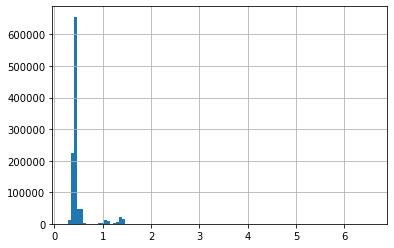

In [7]:
score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],pro_values[index])))

attack_df['score'] = score_list
attack_df['score'].hist(bins = 100)

1.36579963032951

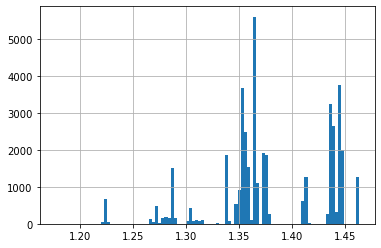

In [8]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].median()

In [10]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.488171
std            0.230004
min            0.274564
25%            0.404716
50%            0.426432
75%            0.447615
max            6.573879
Name: score, dtype: object

In [11]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         1.380329
std          0.053284
min          1.176635
25%          1.354040
50%          1.365800
75%          1.437380
max          1.463493
Name: score, dtype: object

In [18]:
attack_df['score'].quantile(0.97)

1.3551917937906417

In [17]:
41824/1070554

0.03906762293167836

In [19]:
anomalous_dict = attack_df[attack_df['score'] > 1.355]

In [21]:
anomalous_dict['ip.dst'].value_counts()

89.100.107.148     28977
89.100.107.147       990
10.244.0.2           777
168.63.129.16        646
10.244.0.11          600
10.244.0.15          199
142.250.179.138       57
10.244.0.6            51
66.249.81.204         45
198.143.164.251       38
20.126.199.164        29
52.236.186.218        29
198.143.164.243       24
66.249.81.206         15
169.254.169.254       12
172.217.168.234        9
216.58.214.14          8
45.83.65.187           8
142.250.179.142        6
13.69.65.27            4
40.113.176.128         3
13.69.65.29            2
13.69.65.31            2
Name: ip.dst, dtype: int64

In [22]:
28977/41824

0.6928318668706962

In [23]:
len(anomalous_dict)

32531